In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('letterdata.csv')

In [4]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


<Axes: xlabel='count', ylabel='letter'>

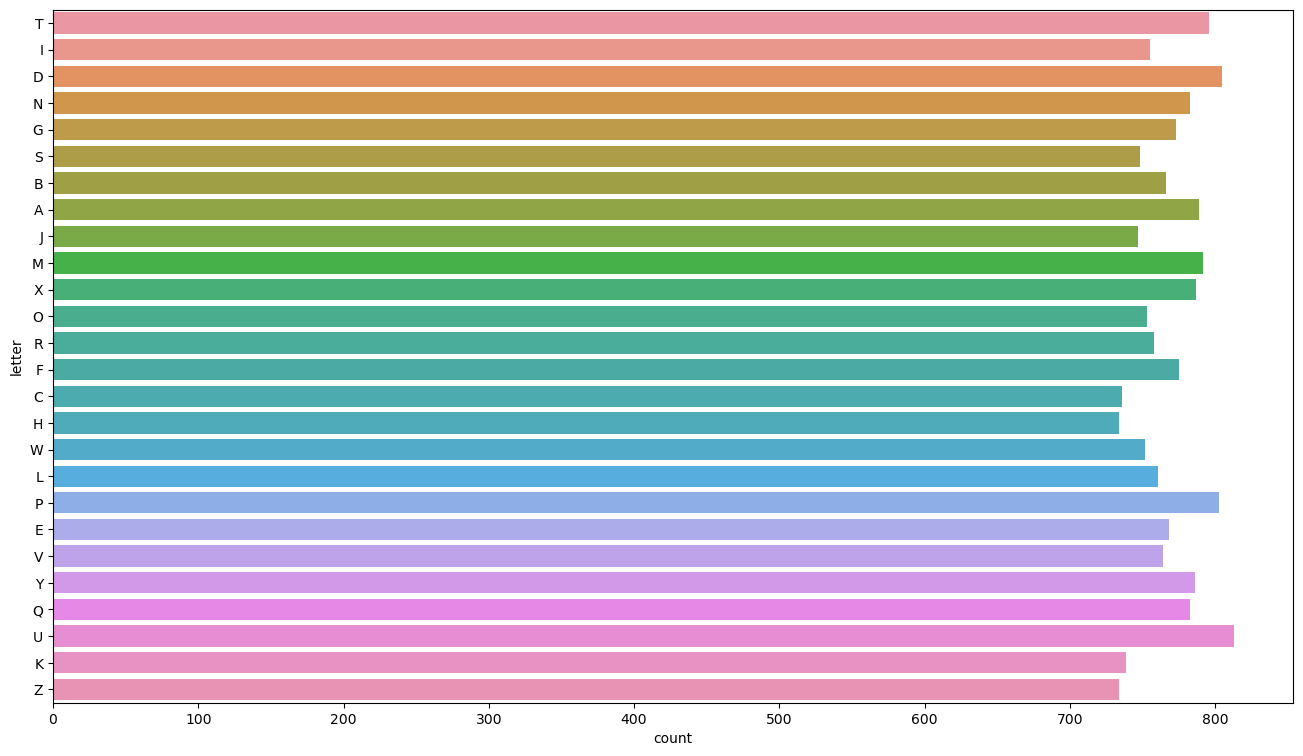

In [5]:
plt.figure(figsize=(16,9))
sns.countplot(y = df['letter'])

#### Separate the input and output data

In [6]:
x = df.drop('letter', axis = 1)
y = df['letter']

In [7]:
x.shape

(20000, 16)

In [8]:
x.columns

Index(['xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar', 'x2bar',
       'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge',
       'yedgex'],
      dtype='object')

#### Cross-Validation

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [11]:
x_train.shape, x_test.shape

((16000, 16), (4000, 16))

#### Create the model

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
clf = RandomForestClassifier(random_state=0, n_estimators=10)

In [14]:
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score

In [16]:
y_pred = clf.predict(x_test)

In [17]:
acc = accuracy_score(y_test, y_pred)
acc

0.93925

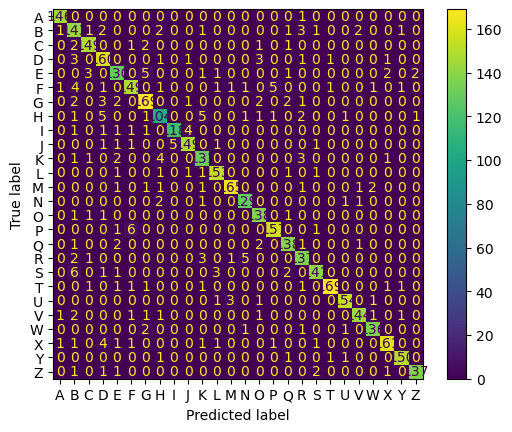

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.97      0.99      0.98       147
           B       0.84      0.91      0.87       158
           C       0.95      0.96      0.95       156
           D       0.89      0.94      0.91       171
           E       0.90      0.90      0.90       145
           F       0.93      0.89      0.91       167
           G       0.92      0.93      0.93       182
           H       0.88      0.85      0.86       123
           I       0.96      0.93      0.94       127
           J       0.96      0.94      0.95       159
           K       0.90      0.92      0.91       143
           L       0.95      0.96      0.96       159
           M       0.97      0.95      0.96       173
           N       0.94      0.96      0.95       134
           O       0.93      0.97      0.95       142
           P       0.96      0.95      0.95       165
           Q       0.93      0.95      0.94       145
           R       0.90    

In [20]:
new = pd.concat([x.iloc[356:357,:], x.iloc[4567:4568,:],x.iloc[11565:11566,:]])
new

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
356,3,8,4,6,2,7,7,14,2,5,6,8,5,8,0,8
4567,6,9,8,7,8,9,5,7,4,7,5,7,6,7,8,9
11565,3,3,5,2,2,7,6,2,7,10,6,10,4,7,3,8


In [21]:
clf.predict(new)

array(['N', 'R', 'K'], dtype=object)

In [22]:
y[356],y[4567],y[11565]

('N', 'R', 'K')